In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [2]:
#read in episode data
episodes = pd.read_csv("../data/episodes_cleaned.csv")
episodes.head()

,text,episode_name,show_names,season_number,episode_number,show_year
0,Can it be the breeze that fills the trees Wit...,The Nicked Knockwurst,'Allo 'Allo!,3,1.0,1982
1,Madame Peyet is in the family way. She is ple...,Gruber Does Some Mincing,'Allo 'Allo!,3,2.0,1982
2,Ooar! Ooh! Are you by any chance curious to ...,The Sausage in the Wardrobe,'Allo 'Allo!,3,3.0,1982
3,It is possible that the more curious among you...,The Flight of Fancy,'Allo 'Allo!,3,4.0,1982
4,"Oh. Do you by any chance wish to know how I, ...",Pretty Maids All in a Row,'Allo 'Allo!,3,5.0,1982


In [3]:
episodes.shape

(117416, 6)

In [7]:
sia = SentimentIntensityAnalyzer()
def episode_sentiment(text):
    return sia.polarity_scores(text)["compound"]

episodes["composite_sentiment"] = episodes["text"].apply(episode_sentiment)

In [8]:
episodes.head()

,text,episode_name,show_names,season_number,episode_number,show_year,composite_sentiment
0,Can it be the breeze that fills the trees Wit...,The Nicked Knockwurst,'Allo 'Allo!,3,1.0,1982,0.9997
1,Madame Peyet is in the family way. She is ple...,Gruber Does Some Mincing,'Allo 'Allo!,3,2.0,1982,0.9997
2,Ooar! Ooh! Are you by any chance curious to ...,The Sausage in the Wardrobe,'Allo 'Allo!,3,3.0,1982,0.9911
3,It is possible that the more curious among you...,The Flight of Fancy,'Allo 'Allo!,3,4.0,1982,0.9996
4,"Oh. Do you by any chance wish to know how I, ...",Pretty Maids All in a Row,'Allo 'Allo!,3,5.0,1982,0.9995


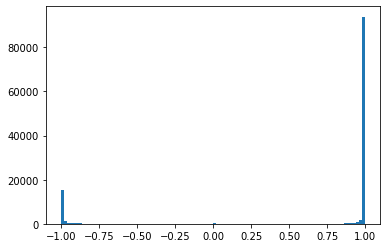

In [12]:
plt.hist(episodes["composite_sentiment"], bins=100);

In [13]:
episodes.to_csv("../data/episodes_with_sentiment.csv", index=False)

In [14]:
len(episodes[episodes["composite_sentiment"] < -.75]["composite_sentiment"])

18227

In [15]:
len(episodes[episodes["composite_sentiment"] > .75]["composite_sentiment"])

97847

In [16]:
len(episodes[(episodes["composite_sentiment"] > -.75) & (episodes["composite_sentiment"] < .75)]["composite_sentiment"])

1342

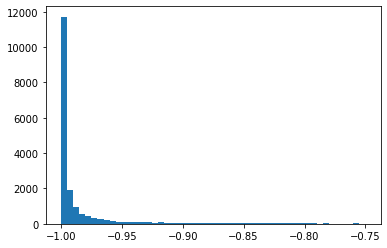

In [24]:
negative = episodes[episodes["composite_sentiment"] < -.75]["composite_sentiment"]
plt.hist(negative, bins=50);

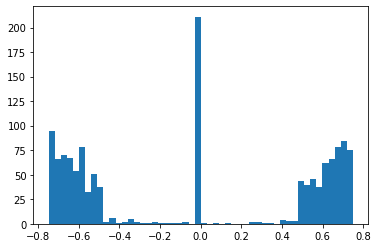

In [23]:
middle = episodes[(episodes["composite_sentiment"] > -.75) & (episodes["composite_sentiment"] < .75)]["composite_sentiment"]
plt.hist(middle, bins=50);

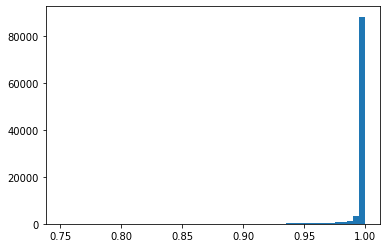

In [22]:
positive = episodes[episodes["composite_sentiment"] > .75]["composite_sentiment"]
plt.hist(positive, bins=50);